# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Diego Felipe Diaz Perez
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sct
import pandas as pd
import scipy.interpolate as sci

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [2]:
#a
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
data=pd.DataFrame({"tiempo":t,"corriente":i})
data

,tiempo,corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [3]:
#b
def diferencias_finitas(y,x,h):
  fp = np.zeros_like(x)
  for i in range(len(x)):
    if i == 0:
      fp[i] = (y[i+1]-y[i])/h
    elif i == len(x)-1:
      fp[i] = (y[i]-y[i-1])/h
    else:
      fp[i] = (y[i+1]-y[i-1])/(2*h)
  return fp
def derivada_3puntos(y,x,h):
 n=len(x)
 fprime=np.zeros(n)
 for i in range (0,n):
  if i==0:
    fprime[i]=(-3*y[i]+4*y[i+1]-y[i+2])/(2*h)
  elif i==n-1:
    fprime[i]=(3*y[-1]-4*y[-2]+y[-3])/(2*h)
  else:
    fprime[i]=(y[i+1]-y[i-1])/(2*h)
 return fprime
def voltaje(d,i):
  l=0.98
  r=0.142
  e=l*d+r*i
  return e
dif=diferencias_finitas(i,t,0.01)
der3=derivada_3puntos(i,t,0.01)
print("voltaje con diferencias finitas:",voltaje(dif,i))
print("voltaje con tres puntos",voltaje(der3,i))

voltaje con diferencias finitas: [2.4002  2.40304 3.38588 5.35156 6.34008]
voltaje con tres puntos [2.4002  2.40304 3.38588 5.35156 7.32008]


voltaje con la derivada exacta: [2.37686667 2.30970667 3.22254667 5.11822667 7.99674667]


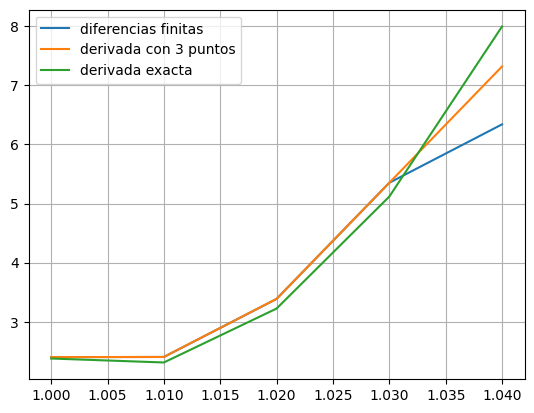

In [4]:
coef=np.polyfit(t, i, 3)
p_derivada = np.polyder(coef)
der=np.polyval(p_derivada, t)
print("voltaje con la derivada exacta:",voltaje(der,i))
plt.plot(t,voltaje(dif,i),label="diferencias finitas")
plt.plot(t,voltaje(der3,i),label="derivada con 3 puntos")
plt.plot(t,voltaje(der,i),label="derivada exacta")
plt.grid()
plt.legend()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [5]:
#a
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
d=np.gradient(x,t)
print("velocidad instantaneaa m/s:",d)

velocidad instantaneaa m/s: [75.         77.4        79.4        67.7        69.16666667 83.66666667]


In [6]:
#b
cub=sci.CubicSpline(t,d)
print("velocidad para t=12:",cub(12))

velocidad para t=12: 78.29663504111319


# 3.
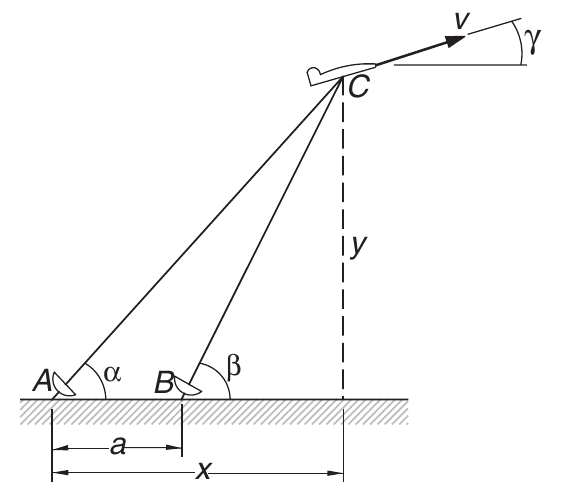


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [7]:
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
df

,t (s),alpha (°),beta (°)
0,9,54.80,65.59
1,10,54.06,64.59
2,11,53.34,63.62


In [8]:
a_r=np.radians(df["alpha (°)"])
b_r=np.radians(df["beta (°)"])
t=df["t (s)"]
def x(A,B):
  a=500
  x=a*((np.tan(B))/(np.tan(B)-np.tan(A)))
  return x
def y(A,B):
  a=500
  y=a*((np.tan(A)*np.tan(B))/(np.tan(B)-np.tan(A)))
  return y
def r(x,y):
  r=np.arctan(y/x)
  return r
def v(vx,vy):
  v=(vx**2+vy**2)**(1/2)
  return v
x=x(a_r,b_r)
y=y(a_r,b_r)
vx=np.gradient(x,t)
vy=np.gradient(y,t)
v=v(vx,vy)
r=r(x,y)
print("velocidad en el eje x en t=10s:",vx[1],"m/s")
print("velocidad en el eje y en t=10s:",vy[1],"m/s")
print("velocidad total en t=10s:",v[1],"m/s")
print("angulo γ en t=10s en radianes:",r[1])

velocidad en el eje x en t=10s: 48.36097598564322 m/s
velocidad en el eje y en t=10s: 13.083197366050399 m/s
velocidad total en t=10s: 50.09944162965281 m/s
angulo γ en t=10s en radianes: 0.9435249936281346


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [9]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
cub=sci.CubicSpline(t,v)
r=sct.quad(cub,0,28)[0]
a=np.gradient(v,t)
print("distancia recorrida desde t=0 hasta t=28:",r,"m")
print("aceleracion del objeto cuando t=28:", a[7])

distancia recorrida desde t=0 hasta t=28: 2319.714323967968 m
aceleracion del objeto cuando t=28: 1.7249999999999979


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [10]:
#primero hallar a con v y z
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
v = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
a=-np.gradient(v,z)
az=sci.CubicSpline(z,a)
vt=sct.quad(az,0,Z)[0]
cz=sci.CubicSpline(z,c)
ac=az(z)*cz(z)
acz=sci.CubicSpline(z,ac)
i=sct.quad(acz,0,Z)[0]
C=i/vt
print("concentracion promedio:", C)

concentracion promedio: 8.097333333333333


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea mejor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [11]:
f=lambda r: r**2*(2-r)**2*np.exp(-r)
I=[]
err=[]
for R in range(10,26):
  i,e=sct.quad(f,0,R)
  I.append(i)
  err.append(e)
p_cua=np.array(I)/8
print(I)
print(err)
print(p_cua)
# dado que quad me dio un error de cada uno por debajo de 10**-6 entonces este ya esta y ademas tomare quad como el valor real para verificar el error de los otros metodos

[7.523845536651059, 7.745783412271672, 7.868415548241123, 7.933661592234513, 7.967304290764847, 7.9841992274391185, 7.992494353986923, 7.996488463427548, 7.998379164635649, 7.9992608510799785, 7.999666571300806, 7.999851062589819, 7.999934063669009, 7.999971046209239, 7.9999873804802455, 7.999994537413376]
[8.353146548577363e-14, 1.0867786751868802e-13, 6.161892319360516e-13, 4.447669764765221e-12, 2.8835934969039315e-11, 1.6141761267473437e-10, 8.035406077501472e-10, 3.5013184252960516e-09, 1.3594326279259272e-08, 4.822332213411107e-08, 8.880953554141527e-14, 8.882719961943687e-14, 1.114976327885593e-13, 2.402141854332895e-13, 6.176922597137023e-13, 1.6668584237487447e-12]
[0.94048069 0.96822293 0.98355194 0.9917077  0.99591304 0.9980249
 0.99906179 0.99956106 0.9997974  0.99990761 0.99995832 0.99998138
 0.99999176 0.99999638 0.99999842 0.99999932]


In [12]:
#trapecio
def trapecio(f,a,b,p,t=1e-6,m=1000):
  if b<a:
    return print("b es menor a a")
  for n in range(1,m+1):
    h=(b-a)/n
    integral= f(a)+f(b)
    for i in range(1,n):
      xi=a+i*h
      integral+=2*f(xi)
    if abs(h/2*integral-I[p])<t:
      return h/2*integral
      break
  return print("numero maximo de iteraciones")
intra=[]
p=0
for i in range(10,26):
  intra.append(trapecio(f,0,i,p,1e-6,100000))
  p+=1
itra=np.array(intra)
print("integral por trapecio:",itra)
print("probabilidad:",itra/8)

integral por trapecio: [7.52384454 7.74578241 7.86841455 7.93366059 7.96730329 7.98419823
 7.99249336 7.99648747 7.99837817 7.99925986 7.99966557 7.99985007
 7.99993307 7.99997006 7.99998638 7.99999354]
probabilidad: [0.94048057 0.9682228  0.98355182 0.99170757 0.99591291 0.99802478
 0.99906167 0.99956093 0.99979727 0.99990748 0.9999582  0.99998126
 0.99999163 0.99999626 0.9999983  0.99999919]


In [13]:
#simpson
def simpson(f,a,b,p,t=1e-6,m=1000):
  if b<a:
    return print("b es menor a a")
  for n in range(1,m+1):
    h=(b-a)/n
    integral= f(a)+f(b)
    inte_impar=0
    inte_par=0
    for i in range(1,n):
      xi=a+i*h
      if i%2==0:
        inte_par+=f(xi)
      else:
        inte_impar+=f(xi)
    integral+=4*inte_impar+2*inte_par
    if abs(integral*h/3-I[p])<t:
      return integral*h/3
  return print("numero maximo de iteraciones")
insim=[]
p=0
for i in range(10,26):
  insim.append(simpson(f,0,i,p,1e-6,100000))
  p+=1
isim=np.array(insim)
print("integral por simpson:",isim)
print("probabilidad:",isim/8)

integral por simpson: [7.52384652 7.74578441 7.86841653 7.93366258 7.96730529 7.98420021
 7.99249535 7.99648944 7.9983797  7.99926164 7.9996675  7.999852
 7.99993505 7.99997203 7.99998838 7.99999553]
probabilidad: [0.94048082 0.96822305 0.98355207 0.99170782 0.99591316 0.99802503
 0.99906192 0.99956118 0.99979746 0.9999077  0.99995844 0.9999815
 0.99999188 0.9999965  0.99999855 0.99999944]


In [14]:
#b
f=lambda r: r**2*(2-r)**2*np.exp(-r)
b=np.inf
i=sct.quad(f,0,b)[0]
p=i/8
print(p)

1.0


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

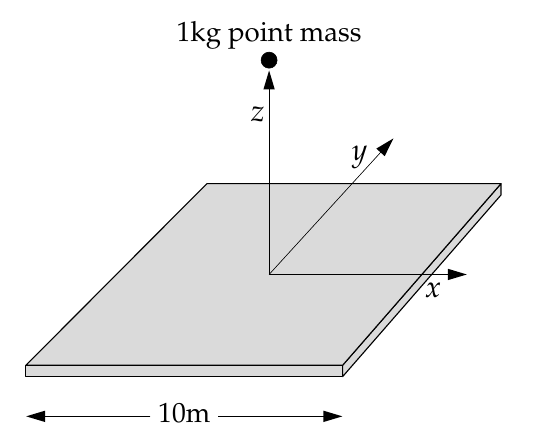

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


/tmp/ipython-input-15-4013304559.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return 1.0 / (x**2 + y**2 + z**2)**1.5
/tmp/ipython-input-15-4013304559.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  Fz = G*o*z*i


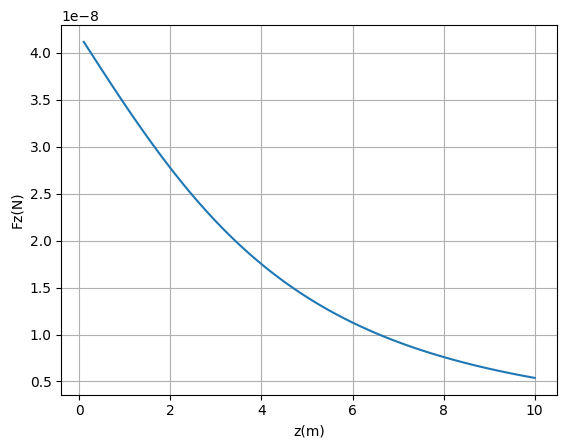

In [15]:
G=6.674e-11
m=10000
l=10
o=m/l**2
def f(y, x, z):
  return 1.0 / (x**2 + y**2 + z**2)**1.5
a, b= -l/2, l/2
g= lambda x: -l/2
h= lambda x: l/2
z_v=np.linspace(0, 10, 100)
Fz_v=[]
for z in z_v:
  i, e= sct.dblquad(f, a, b, g, h, args=(z,))
  Fz = G*o*z*i
  Fz_v.append(Fz)
plt.plot(z_v, Fz_v)
plt.xlabel('z(m)')
plt.ylabel('Fz(N)')
plt.grid()